# Basis Functions for Everything

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define function to be modelled
f = lambda x: np.exp(np.sin(x))
# Define interval
t = np.linspace(-np.pi, np.pi, 1000)
# Define basis functions
u = lambda i,x: np.power(x,i)* np.exp(x)
# Define norm function
dot_product_within_basis =  lambda u,i,j,x: np.trapz(u(i,x)*u(j,x))
dot_product =  lambda f,u: np.trapz(f*u)
norm = lambda Q: np.sqrt(np.trapz(Q*Q))

## Effect of Number of Basis Function

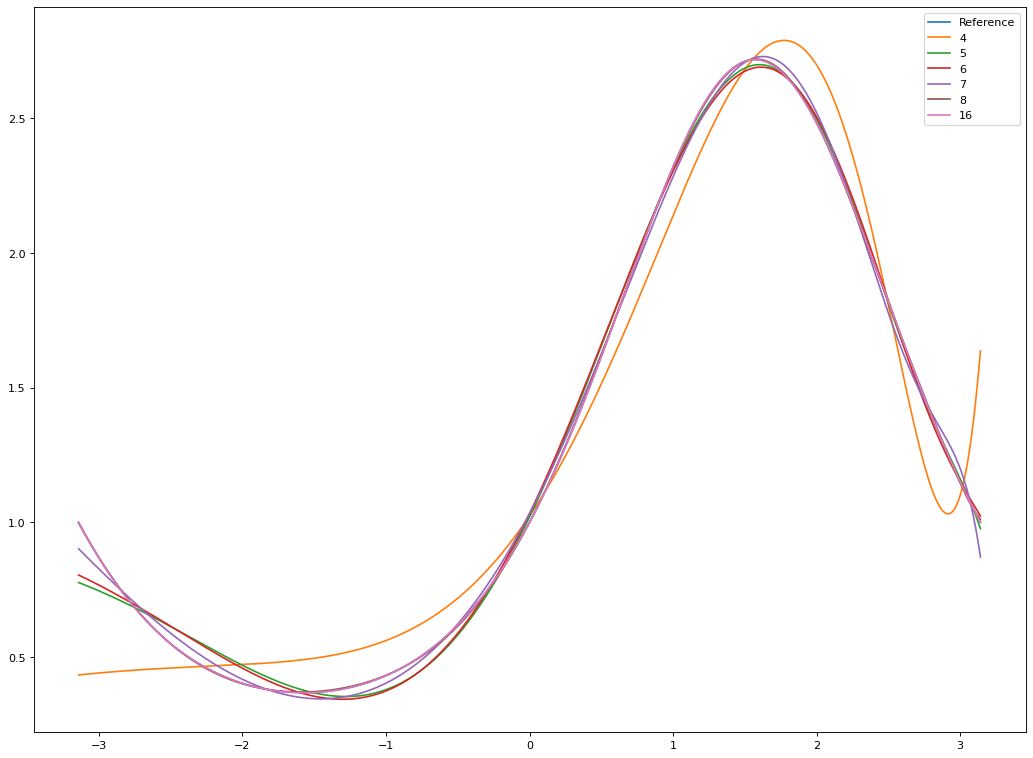

In [3]:
fig, ax = plt.subplots(figsize=(16, 12), dpi=80)
plt.plot(t, f(t), label = "Reference")
N = [4,5,6,7,8,16]
for n in N:
    G = np.zeros((n+1,n+1))
    y = np.zeros(n+1)
    for i in range(n+1):
        for j in range(n+1):
            G[i,j] = dot_product_within_basis(u,i,j,t)
        y[i] = dot_product(f(t),u(i,t))
    # Find coeffs
    c = np.linalg.solve(G, y)

    # Define model
    f_hilbert = lambda c,u,x: sum(c[k]*u(k,x) for k in range(c.shape[0]))
    
    plt.plot(t, f_hilbert(c,u,t), label = str(n))
plt.legend()

## Orthonormality Effect

**Ortonormalization**  
1. q0 = u0/norm(u0)
2. Q1 = u1 - dot_product(u1,q0)* q0
3. q1 = Q1/norm(Q1)
4. Q2 = u2 - dot_product(u2,q0)* q0 - dot_product(u1,q1) * q1
5. q2 = Q2/norm(Q2)
6. ...

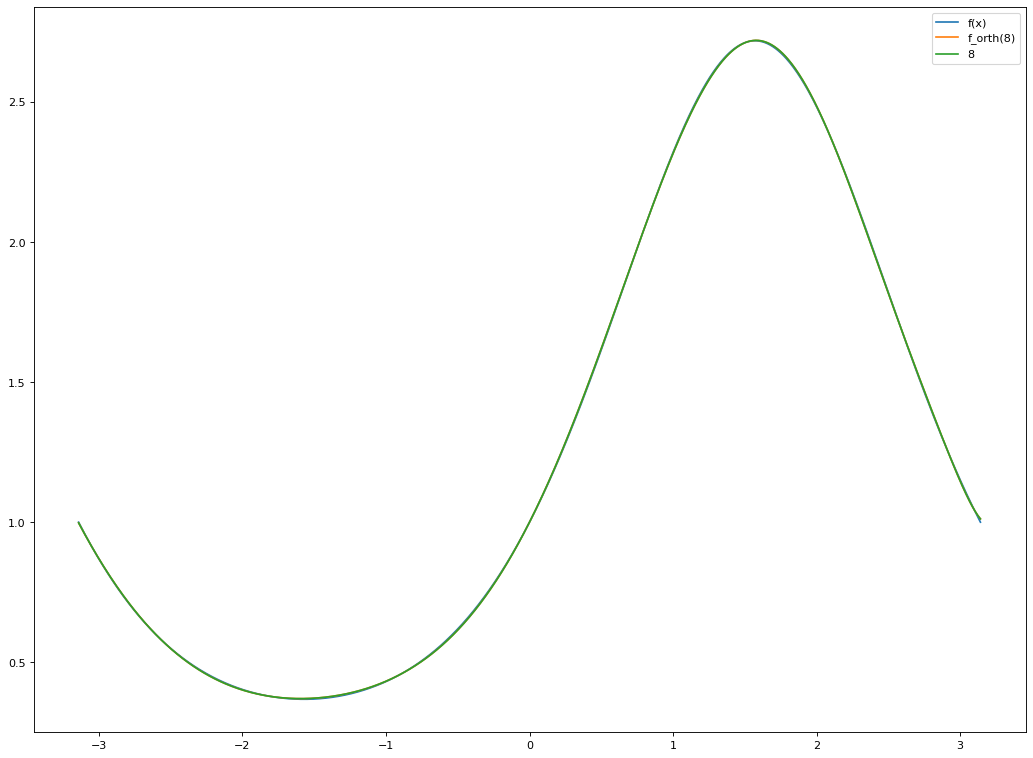

In [12]:
# From BERNA YILMAZ
# Orthonormalize the basis set using Gram-Schmidt process
def orthonormalize_basis(n):
    basis_set = []
    for i in range(n+1):
        basis_i = u(i,x)
        for j in range(i):
            basis_i -= np.trapz(u(i,x)* basis_set[j]) * basis_set[j]
        basis_i /= np.sqrt(np.trapz(basis_i* basis_i))
        basis_set.append(basis_i)
    return basis_set

# Calculate the coefficients using the orthonormal basis
def calculate_coefficients_orth(n):
    coefficients = []
    basis_set = orthonormalize_basis(n)
    for i in range(n+1):
        coefficients.append(np.trapz(f(x)* basis_set[i]))
    return coefficients

# Calculate the approximate function using the orthonormal basis
def approximate_function_orth(x, coefficients):
    result = np.zeros_like(x)
    basis_set = orthonormalize_basis(len(coefficients)-1)
    for i, coefficient in enumerate(coefficients):
        result += coefficient * basis_set[i]
    return result

# Set the range of x values
x = np.linspace(-np.pi, np.pi, 1000)



# Calculate the coefficients and approximate function for n = 8 using orthonormal basis
coefficients_orth = calculate_coefficients_orth(8)
f_orth = approximate_function_orth(x, coefficients_orth)


fig, ax = plt.subplots(figsize=(16, 12), dpi=80)
# Plot the results
plt.plot(x, f(x), label='f(x)')
plt.plot(x, f_orth, label='f_orth(8)')
n = 8
G = np.zeros((n+1,n+1))
y = np.zeros(n+1)
for i in range(n+1):
    for j in range(n+1):
        G[i,j] = dot_product_within_basis(u,i,j,t)
    y[i] = dot_product(f(t),u(i,t))
# Find coeffs
c = np.linalg.solve(G, y)

# Define model
f_hilbert = lambda c,u,x: sum(c[k]*u(k,x) for k in range(c.shape[0]))

plt.plot(t, f_hilbert(c,u,t), label = str(n))


plt.legend()
plt.show()

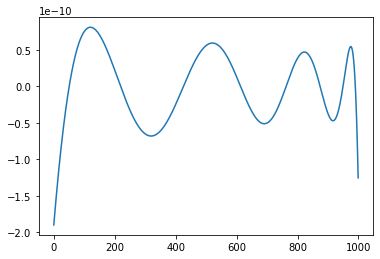

In [13]:
err = f_hilbert(c,u,t) - f_orth
plt.plot(err)